###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, I. Hawke. Partly based on [HyperPython](http://nbviewer.ipython.org/github/ketch/HyperPython/tree/master/) by D.I. Ketcheson, also under CC-BY.

# Sods_shock_tube_assessment_module03 

## Coding assignment

Sod's shock tube assignment is to calculate the pressure, density and velocity across the shock tube at time t=0.01s using the Richtmyer method.

![shocktube](./figures/shocktube.png)
#### Figure 1. The shock-tube problem.

### Governing equations

As mentioned in the [shock-tube problem](http://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/03_wave/03_05_Sods_Shock_Tube.ipynb) you will numerically solve the conservative form of the Euler equations (the equations that govern motion for an invicid fluid), that is conservation of mass, conservation of momentum and energy.


The conserved variables $\underline{\mathbf{u}}$ for Euler's equations are

\begin{equation}\underline{\mathbf{u}} = \left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]\end{equation}

where $\rho$ is the density of the fluid, $u$ is the velocity of the fluid and $e_T = e + \frac{u^2}{2}$ is the specific total energy; $\underline{\mathbf{f}}$ is the flux vector:

\begin{equation}\underline{\mathbf{f}} = \left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ \end{array} \right]
\end{equation}

where $p$ is the pressure of the fluid.





If we put together the conserved variables and the flux vector into our PDE, we get the following set of equations:

\begin{equation}
\frac{\partial}{\partial t}
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]
+ \frac{\partial}{\partial x}
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right]
=0
\end{equation}

Applying the equation of state to calculate the pressure—in we derive an equation for the pressure:

$$p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)$$

So, for the Euler equations, the three equations we have are coupled and the flux *vector* is a function of $\underline{\mathbf{u}}$, the vector of conserved variables:

$$\underline{\mathbf{f}} = f(\underline{\mathbf{u}})$$

In order to get everything squared away, we need to represent $\underline{\mathbf{f}}$ in terms of $\underline{\mathbf{u}}$.
We can introduce a little shorthand for the $\underline{\mathbf{u}}$ and $\underline{\mathbf{f}}$ vectors and define:


$$\underline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$

$$\underline{\mathbf{f}} = 
\left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right]
$$  

We can use the derived pressure relation to represent the pressure vector using quantities from the $\underline{\mathbf{u}}$ vector.

$$p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)$$

Now that pressure can be represented in terms of $\underline{\mathbf{u}}$, the rest of $\underline{\mathbf{f}}$ isn't too difficult to resolve:

$$\underline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

### The Richtmyer method 

For this exercise, you will be using a new scheme called the Richtmyer method.  Like the MacCormack method that we learned in [lesson 2](http://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/03_wave/03_02_convectionSchemes.ipynb), Richtmyer is a *two-step method*, given by:

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}


The flux vectors used in the second step are obtained by evaluating the flux functions on the output of the first step:

$$\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right).$$

The first step is like a *predictor* of the solution: if you look closely, you'll see that we are applying a Lax-Friedrichs scheme here. The second step is a *corrector* that applies a leapfrog update. Figure 3 gives a sketch of the stencil for Richmyer method, where the "intermediate time" $n+1/2$ will require a temporary variable in your code, just like we had in the MacCormack scheme.



### Initial conditions

The first test proposed by Sod in his 1978 paper is as follows.  

In a tube spanning from $x = -10 \text{m}$ to $x = 10 \text{m}$ with the rigid membrane at $x = 0 \text{m}$, we have the following initial gas states:

$$\underline{IC}_L = \left[ \begin{array}{c}
\rho_L \\ u_L \\ p_L \\ \end{array}\right] = 
\left[ \begin{array}{c}
1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]$$

$$\underline{IC}_R = \left[ \begin{array}{c}
\rho_R \\ u_R \\ p_R \\ \end{array}\right] = 
\left[ \begin{array}{c}
0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]$$

where $\underline{IC}_L$ are the initial density, velocity and pressure on the left side of the tube membrane and $\underline{IC}_R$ are the initial density, velocity and pressure on the right side of the tube membrane.  


In [15]:
%matplotlib inline
import numpy
from matplotlib import pyplot

Complete the function u_initial (remember we are now refering to a vector $\underline{\mathbf{u}}$) so that it returns a NumPy array with the initial conditions specified.

In [16]:
def u_initial(ICr,ICl,nx,gamma):
    ## computes initial conditions for density, velocity and pressure
    IC = numpy.zeros((nx,3))
    IC[(nx-1)/2:] = ICr.copy()
    IC[:(nx-1)/2] = ICl.copy()
    
    u = numpy.empty_like(IC)
    u[:,0] = IC[:,0]
    u[:,1] = IC[:,0]*IC[:,1]
    u[:,2] = IC[:,2]/(gamma-1) + 0.5*u[:,1]**2/u[:,0]
     
    return u

Write a function computeF() to return an array F as a function of your array u


In [17]:
def computeF(u,gamma):
    ## compute the flux F as a function of u
    F = numpy.array([u[:,1],u[:,1]**2/u[:,0] + (gamma - 1)*(u[:,2] - \
    0.5*u[:,1]**2/u[:,0]),(u[:,2] + (gamma-1)*(u[:,2]-0.5*u[:,1]**2/u[:,0]))*\
    u[:,1]/u[:,0]])
    F = F.transpose()
    
    return F

Using the Richtmyer Scheme

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}


The flux vectors used in the second step are obtained by evaluating the flux functions on the output of the first step:

$$\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right).$$

The first step is like a *predictor* of the solution: if you look closely, you'll see that we are applying a Lax-Friedrichs scheme here. The second step is a *corrector* that applies a leapfrog update. Figure 3 gives a sketch of the stencil for Richmyer method, where the "intermediate time" $n+1/2$ will require a temporary variable in your code, just like we had in the MacCormack scheme.

In [33]:
def richtmyer(u, nt, dt, dx, gamma):
    ## Richtmyer scheme 
    
    un = numpy.zeros((nt,u.shape[0],u.shape[1]))
    un[:] = u.copy()
    ustar = u.copy() # predictor   

    for n in range(nt):
        
        ustar[1:,:] = 0.5*(u[1:,:] + u[:-1,:] - \
                dt/dx*(computeF(u[1:,:],gamma)-computeF(u[:-1,:],gamma)))  
                
        Fstar = computeF(ustar,gamma)
         
        un[n,:-1,:] = u[:-1,:] - dt/dx*(Fstar[1:,:] - Fstar[:-1,:]) # the indices here for Fstar are for i+-1/2 and not i+-1 
        #boundary conditions for x=4
        un[n,-1,:] = un[n,-2,:]
        u = un[n].copy()
        
    return un

If you're using IPython notebook, you should be able to copy and paste the code below and it will run (provided you've installed JSAnimation)

In [34]:
nx = 81                         # space discretization
dx = .25                        # space resolution
dt = .0002                      # timestep
nt = int(0.01/dt)                    # number of timesteps  
gamma = 1.4                     # gamma parameter for equation of state
ICl = numpy.array((1,0,1e+5))    # initial conditions for -10<=x<0
ICr = numpy.array((0.125,0,1e+4)) # initial conditions for 0<=x<=10


In [35]:
def animate(data):
    x = numpy.linspace(-10,10,nx)
    y = data
    line.set_data(x,y)
    return line,



In [36]:
u = u_initial(ICr,ICl,nx,gamma)
# sigma = .5
# dt = sigma*dx

un = richtmyer(u,nt,dt,dx,gamma)

/Users/cm1y12/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/cm1y12/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [1]:
fig = pyplot.figure()
ax1 = pyplot.axes(xlim=(-10,10),ylim=(0.,1.),xlabel=('Distance'),ylabel=('density'));
line, = ax1.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un[:,:,0], interval=50)
display_animation(anim, default_mode='once')

NameError: name 'pyplot' is not defined


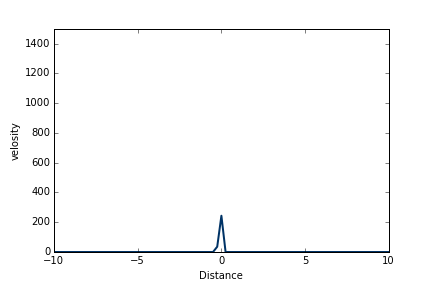
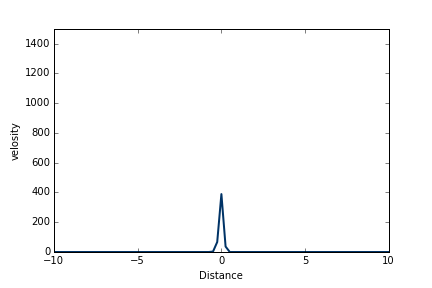
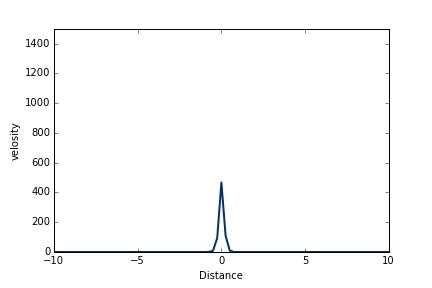
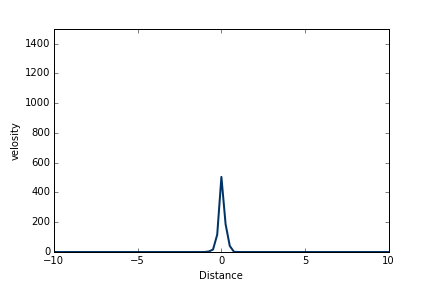
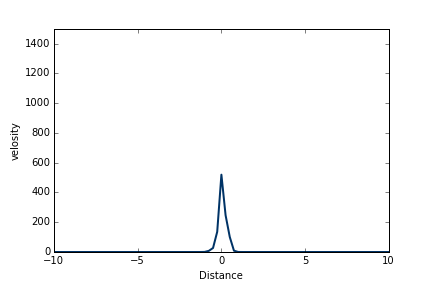
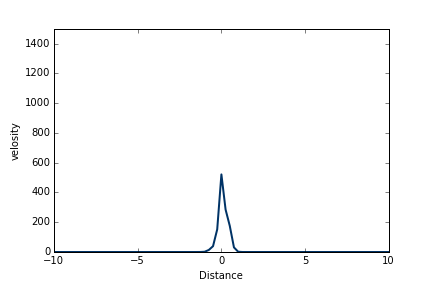
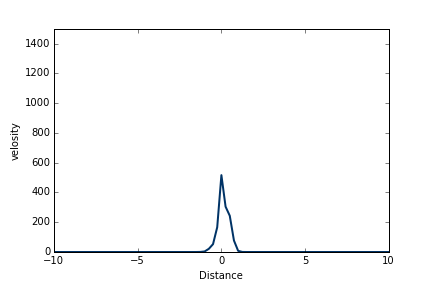
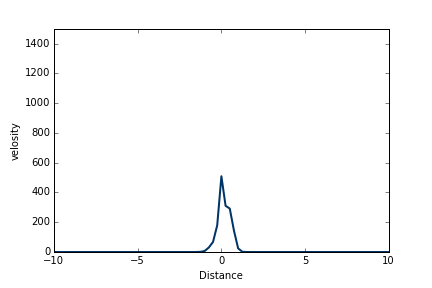
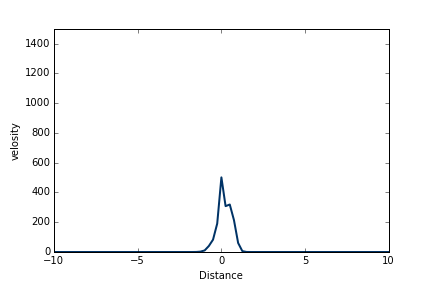
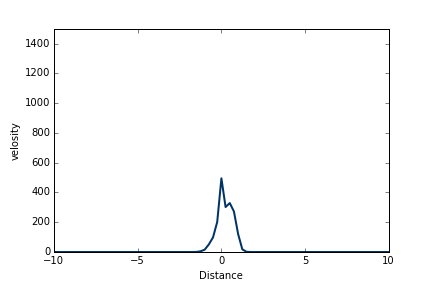
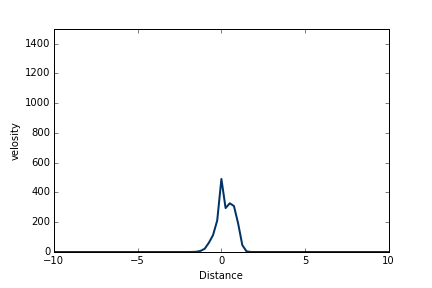
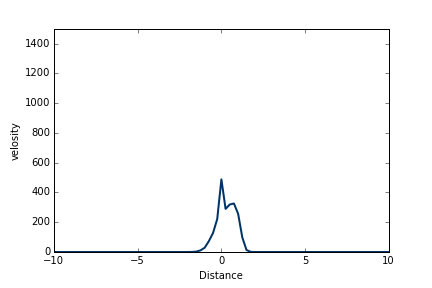
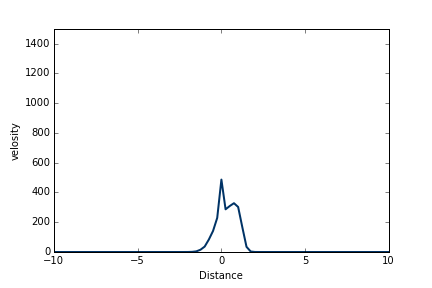
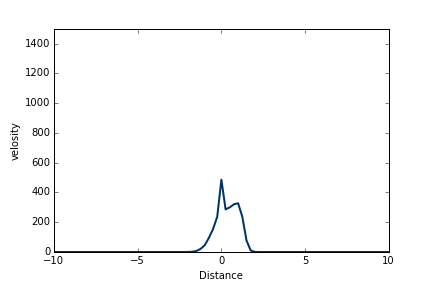
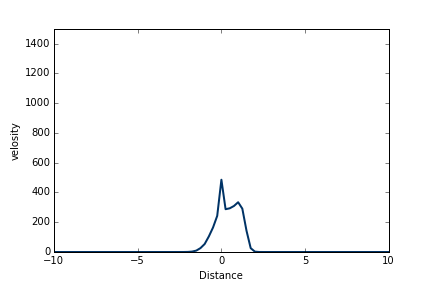
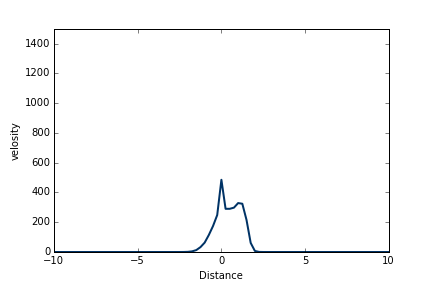
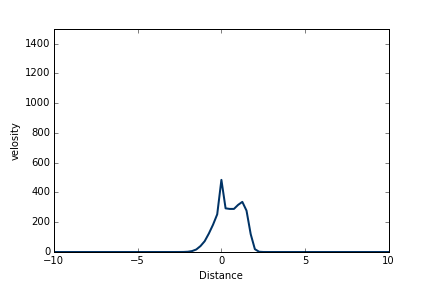
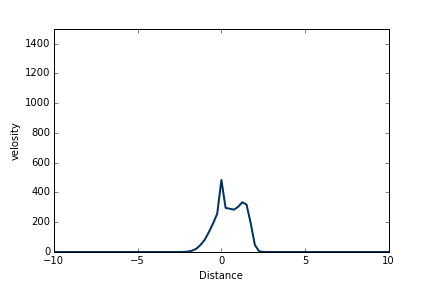
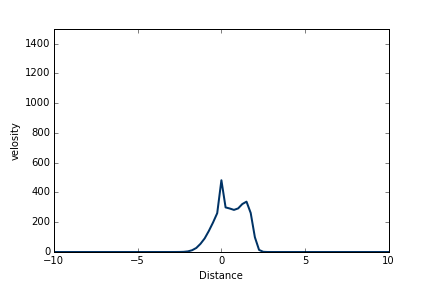
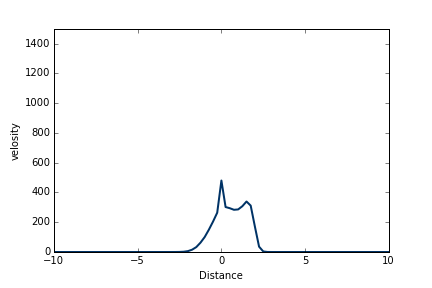
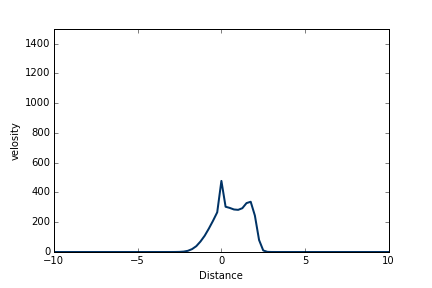
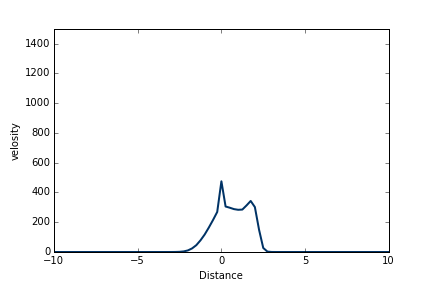
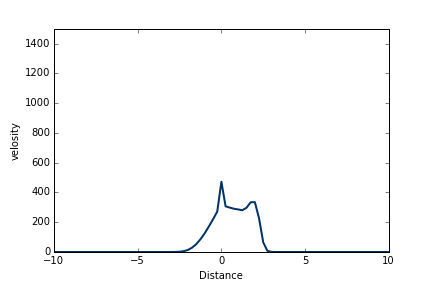
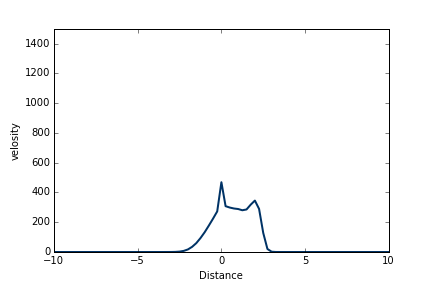
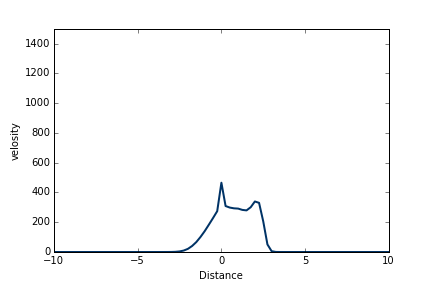
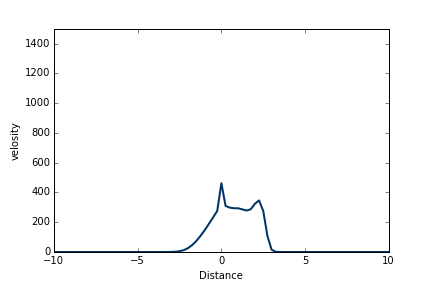
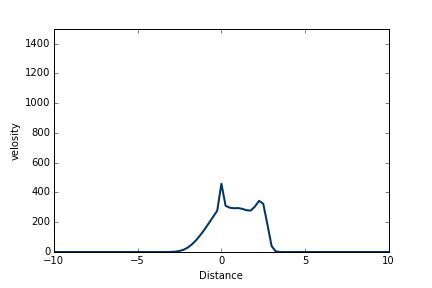
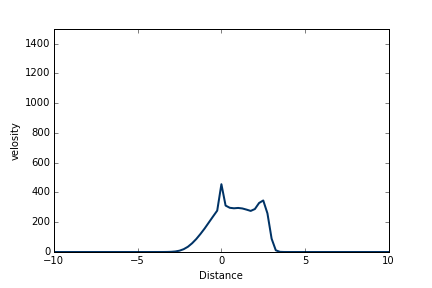
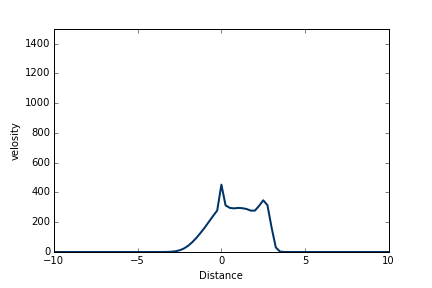
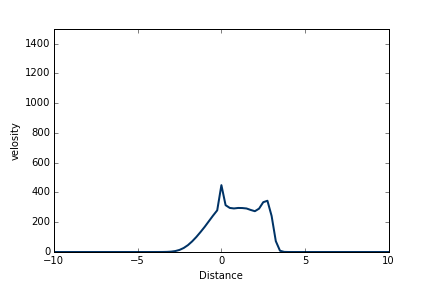
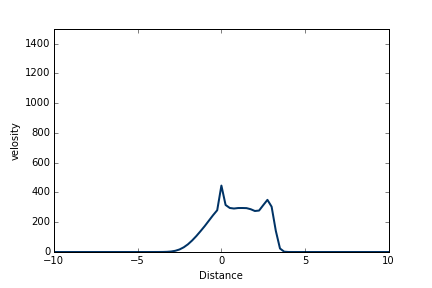
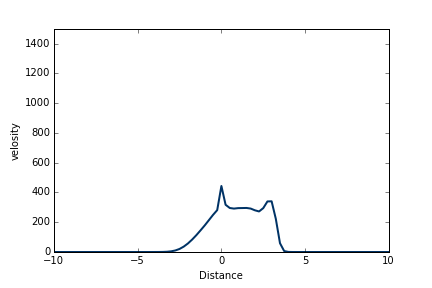
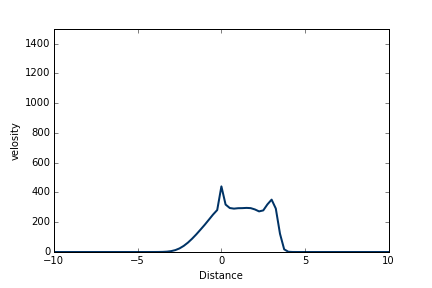
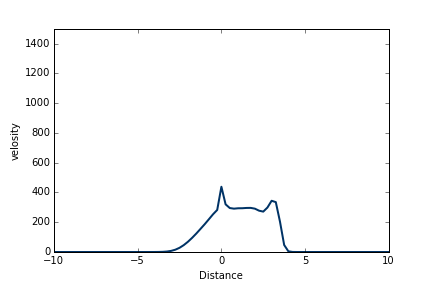
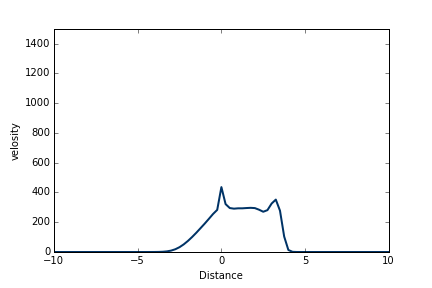
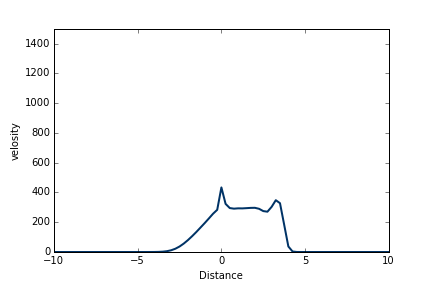
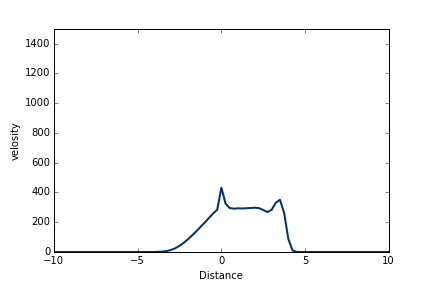
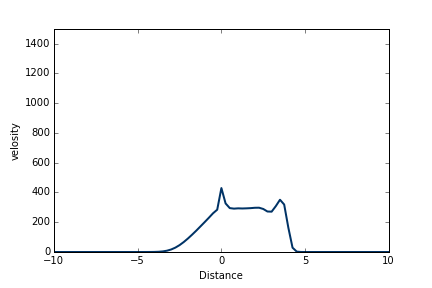
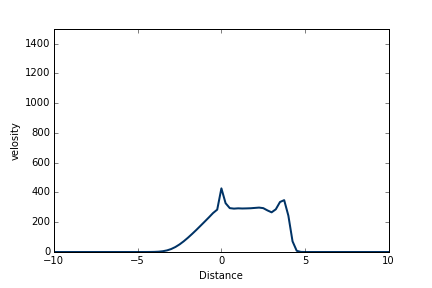
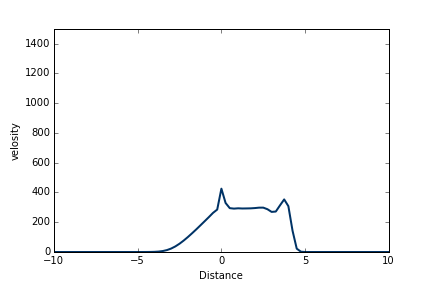
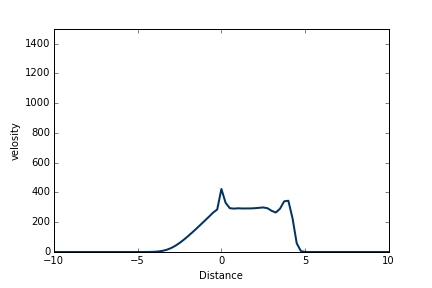
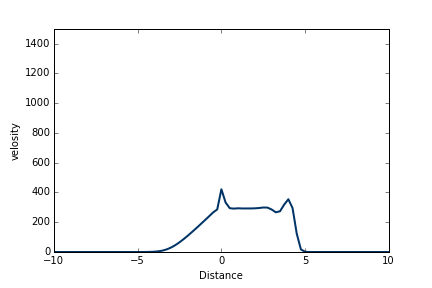
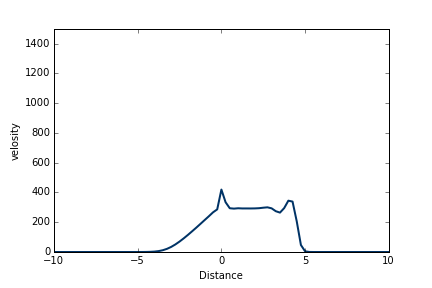
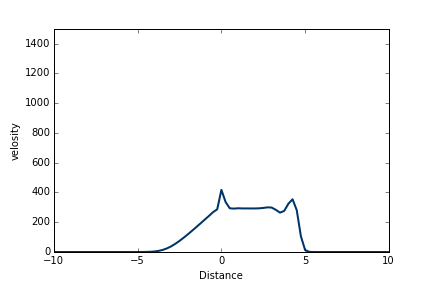
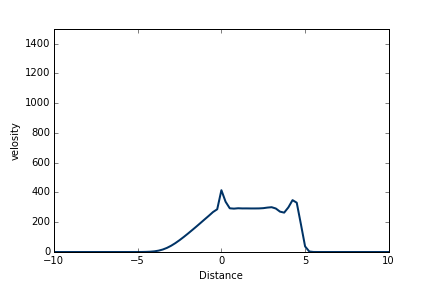
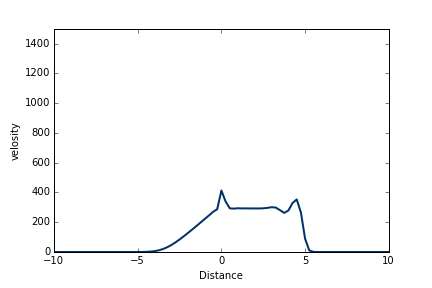
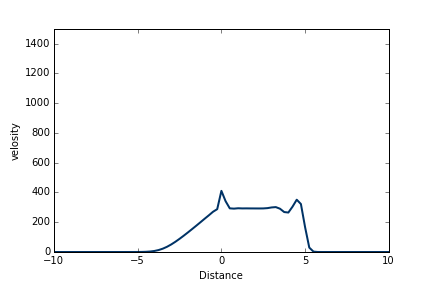
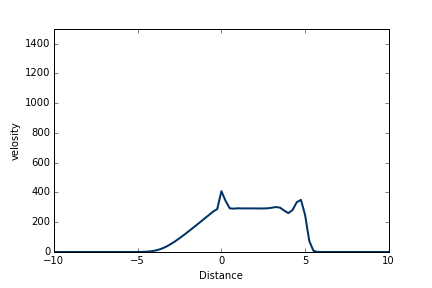
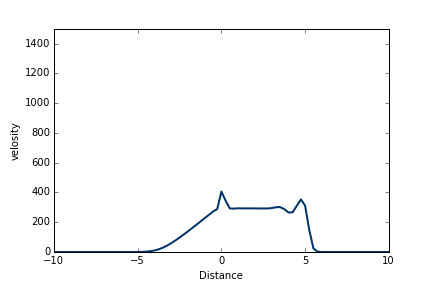
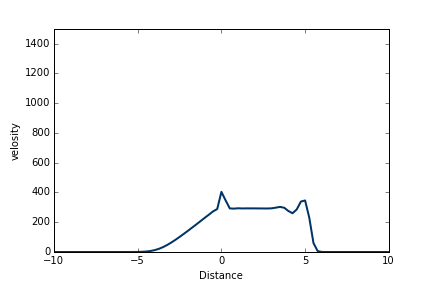

In [44]:
fig = pyplot.figure()
ax2 = pyplot.axes(xlim=(-10,10),ylim=(0.,1500.),xlabel=('Distance'),ylabel=('velosity'));
line, = ax2.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un[:,:,1]/un[:,:,0], interval=50)
display_animation(anim, default_mode='once')


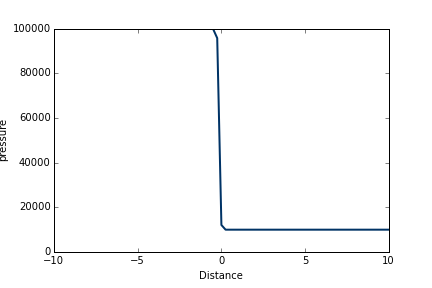
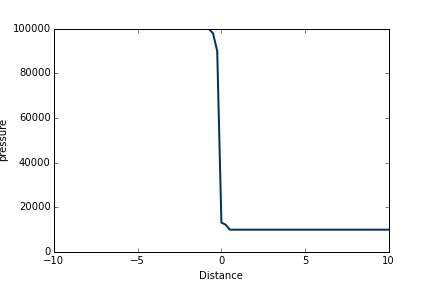
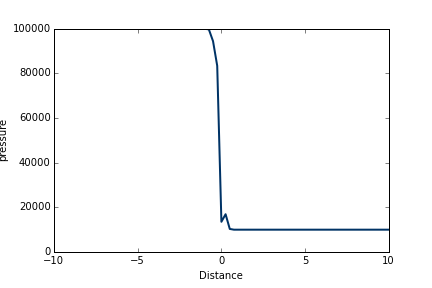
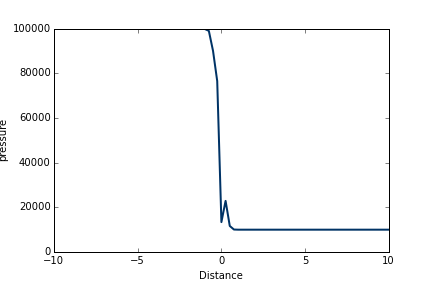
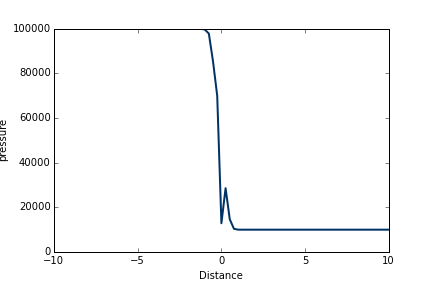
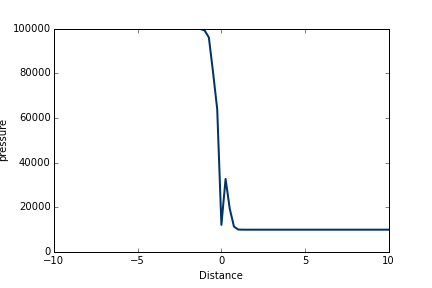
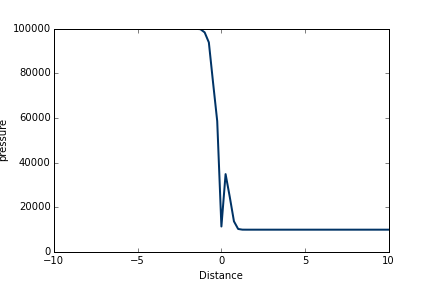
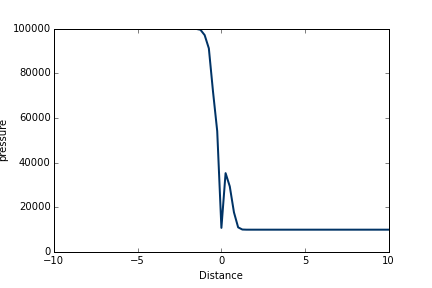
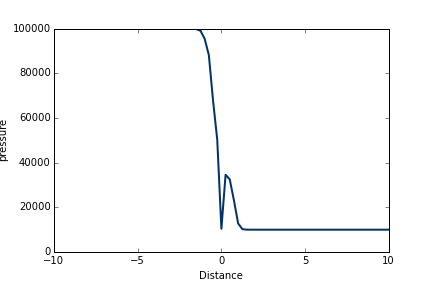
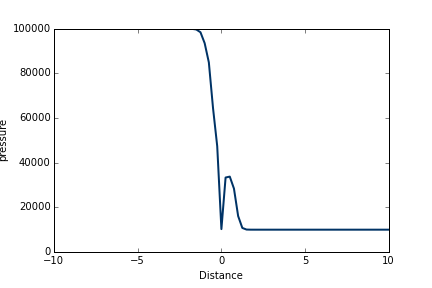
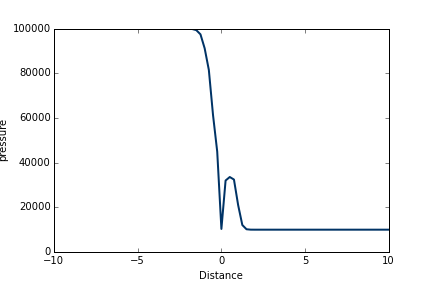
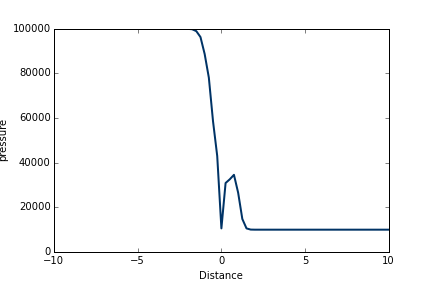
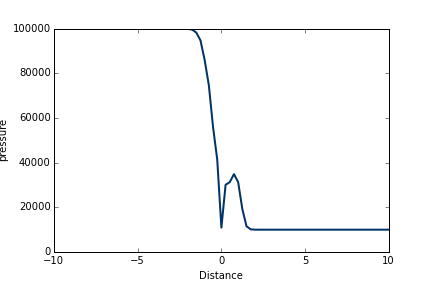
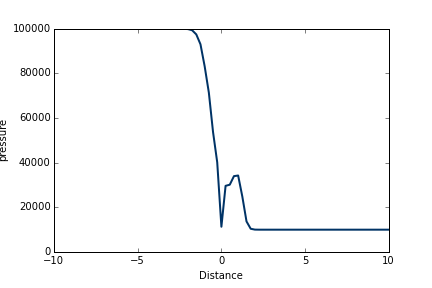
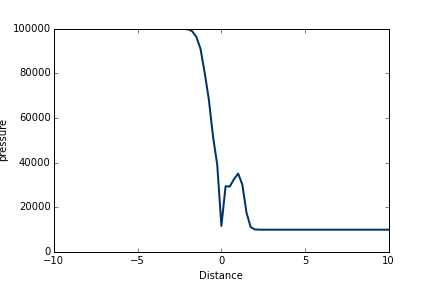
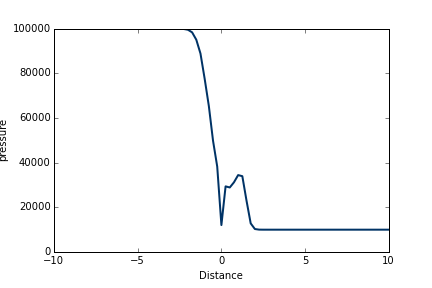
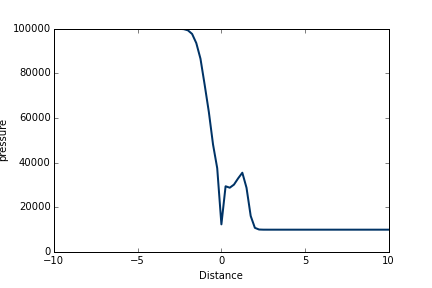
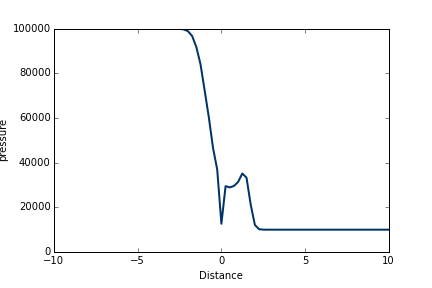
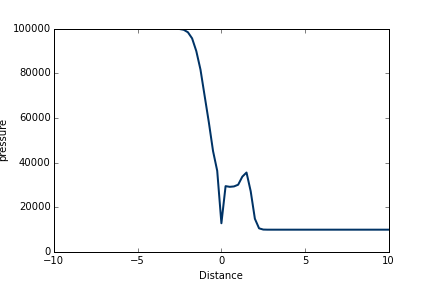
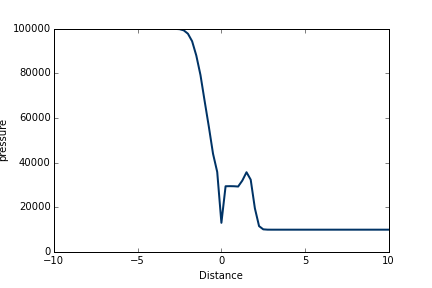
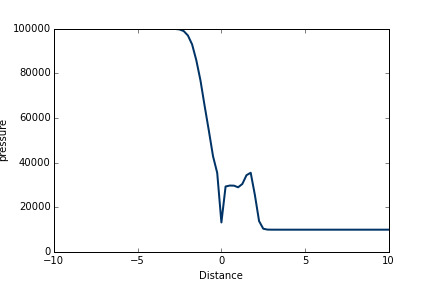
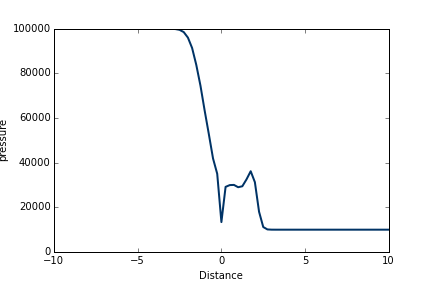
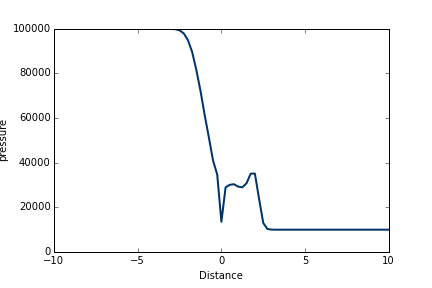
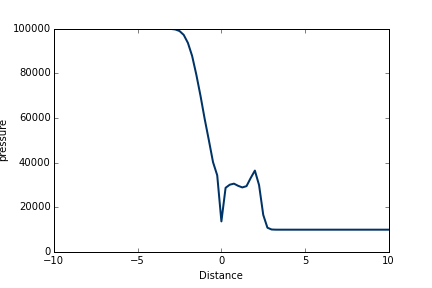
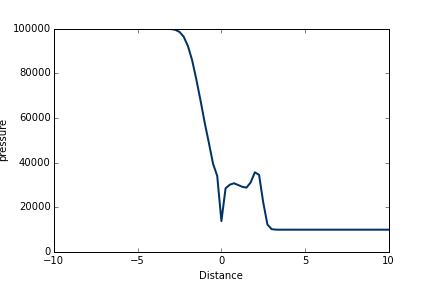
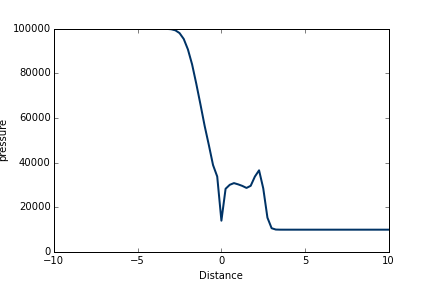
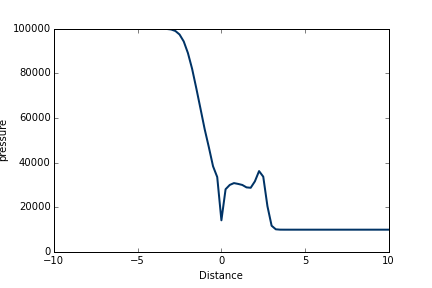
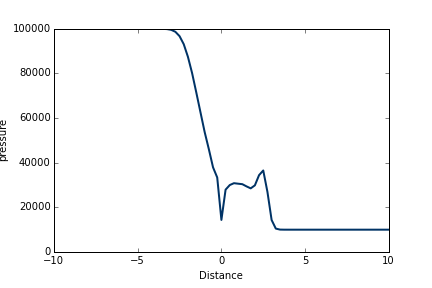
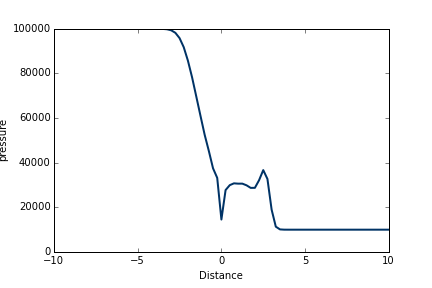
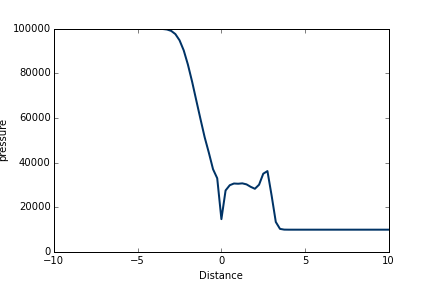
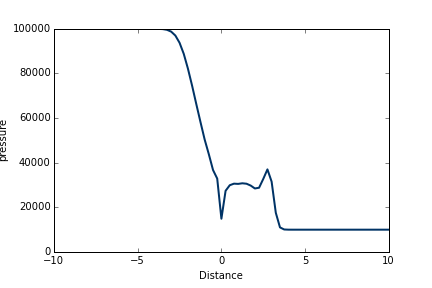
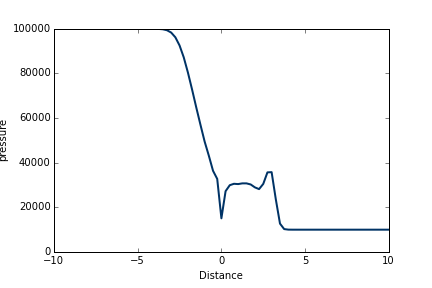
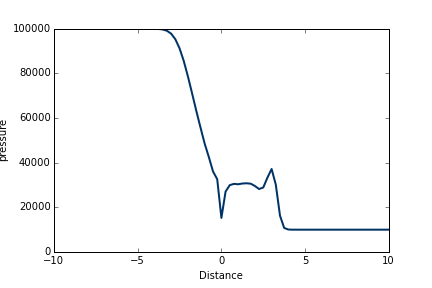
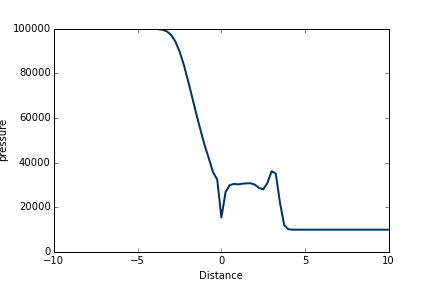
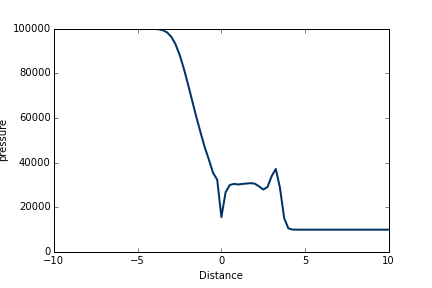
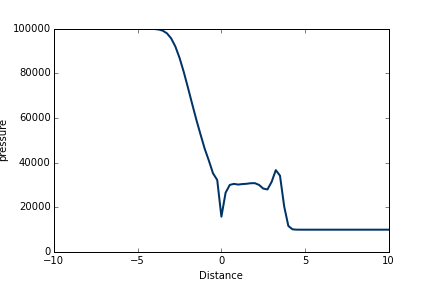
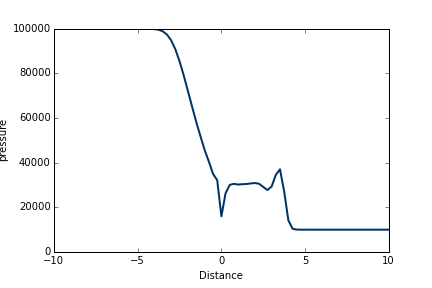
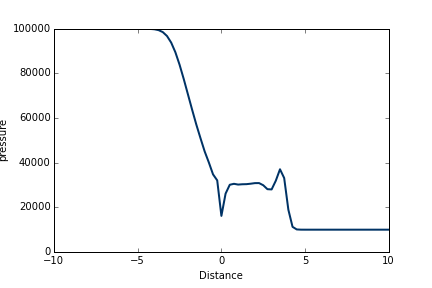
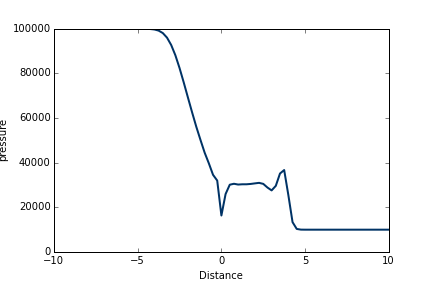
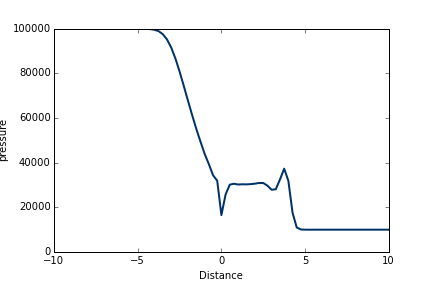
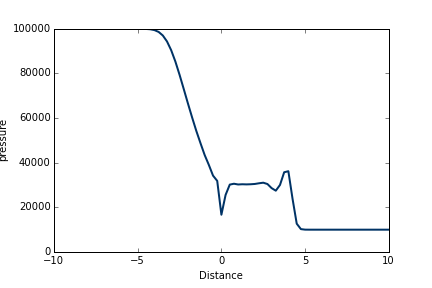
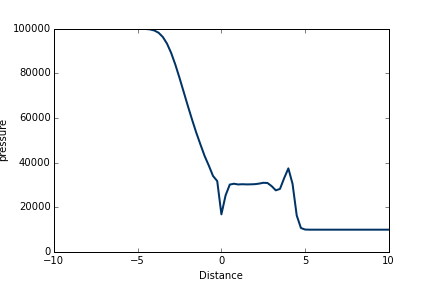
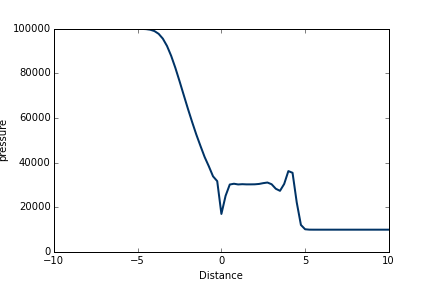
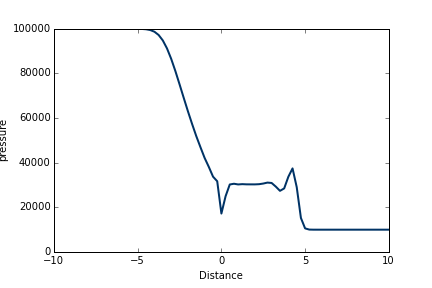
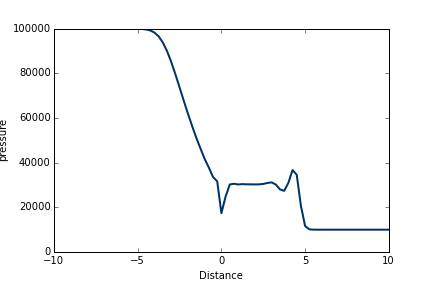
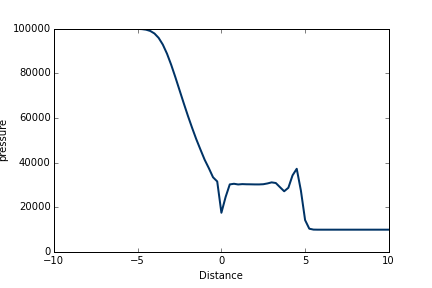
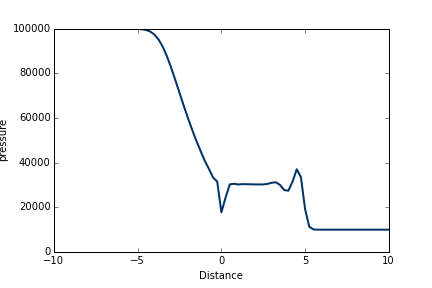
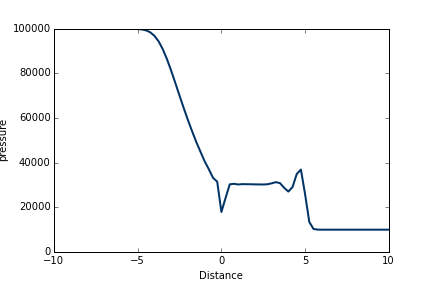
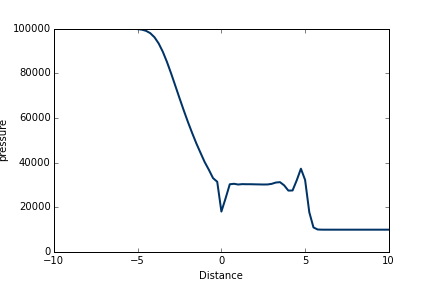
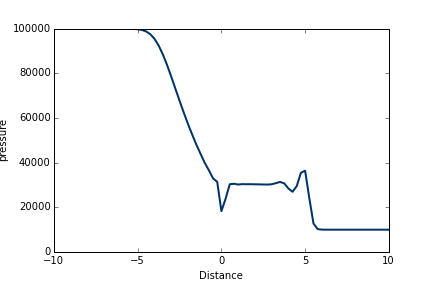

In [45]:
fig = pyplot.figure()
ax3 = pyplot.axes(xlim=(-10,10),ylim=(0.,1e5),xlabel=('Distance'),ylabel=('pressure'));
line, = ax3.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=(gamma-1)*(un[:,:,2] - 0.5*un[:,:,1]**2/un[:,:,0]), interval=50)
display_animation(anim, default_mode='once')